## Análisis de Datos (Multivariante): Cuando hay una categórica

A partir del análisis 2 a 2 de variables, el análisis tiende a complicarse o más bien a hacerse un poco difícil de manejar, en general. El número de combinaciones se dispara (a poco que tengas unas cuantas variables) y ya el consejo de probar todas las posibles se hace imposible de sostener. 

Por eso lo primero es lo primero:

0. Revisa las conclusiones y resultados de los análisis anteriores junto con tus preguntas (si las tuvieras) del principio: Cierra el conjunto de preguntas que no hayas contestado y quieras contestar.
1. Si puedes contestar alguna de esas preguntas atacando tus dataframes con analisis adhoc (es decir propios de tus datos y que a ti se te ocurran), contéstalas.
1. Si todavía necesitas ver más de dos vairables juntas, hazte una planificación: Decide que grupos de variables necesitas ver en conjunto de las preguntas cerradas en 0.
2. Y ahora sí: Si hay una de esas variables que es categórica vale lo que te voy a contar. (eso y quieres ver tres variables en conjunto)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Tres variables: una categórica
Lo que sigue aplica a tres variables, si tienes más lo que tienes que hacer es generalizar el proceso (siempre que tengas al menos tantas variables categóricas como el total menos dos, si tienes 3 una, si quieres ver 4, dos y así).

Cuando tengas tres variables y una sea categórica lo que vamos a hacer es construir un análisis bivariante para cada una de las categorías de la vairable categórica [Jaime tengo dos variables categóricas, ¿Qué hago? y yo tengo las tres... Entonces utiliza la variable categórica más importante según tu criterio como la variable que dirige es decir aquella para cada uno de sus valores vamos a hacer un análisis bivariante de las otras dos]. Veámoslo con dos ejemplos

### Caso 1. Seguros: Análisis response-renew_offer_type-education
Escojo esta combinación porque habíamos visto que había una variación significativa de las respuestas según la oferta y ahora quiero ver como se relaciona eso con el nivel de estudios


**#0 pinto todos los valores** iniciales

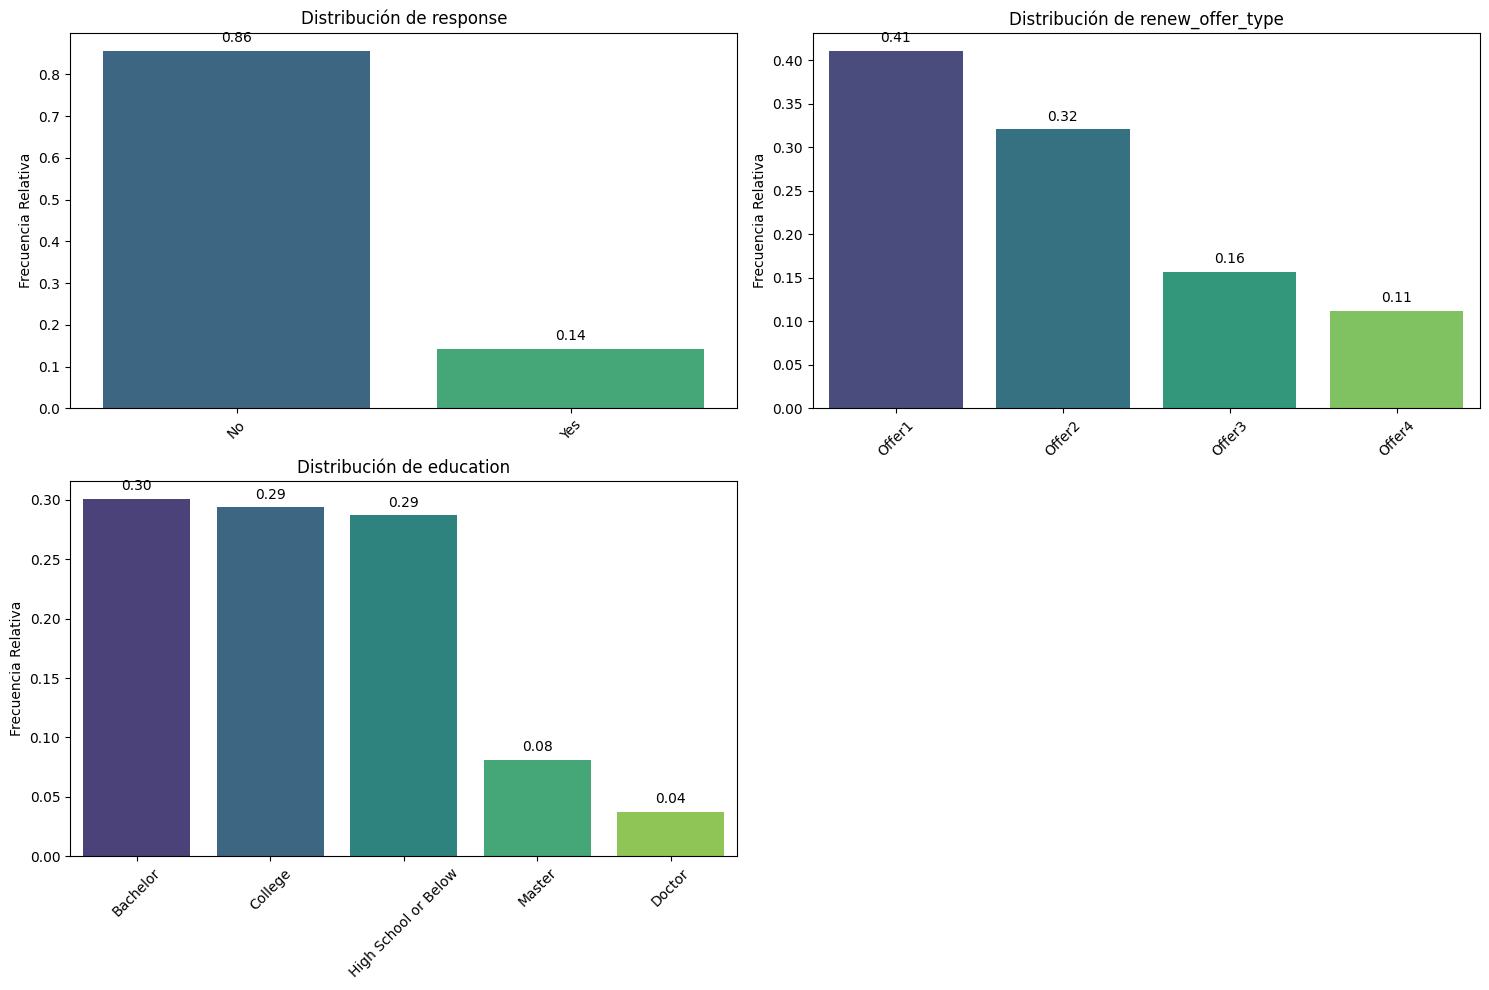

In [12]:
pinta_distribucion_categoricas(df_seguros,["response","renew_offer_type","education"], relativa= True, mostrar_valores= True)

**#1 Escojo variable directora** ya que tengo 3 categóricas y priorizo el resto

En este caso lo tengo claro, `response` es targe, así que esa manda. Luego la siguiente que me interese, que era `renew_offer_type` y finalmente eduaction


¿Por qué este orden? Porque en el bivariante vimos que la oferta tenía impacto en la respuesta. ¿Podría haber hecho un estudio bivariante de education con offer_type? Deberías haberlo hecho pero eso no garantiza el análisis con "response"

**#2 Muestro el bivariante de cada una con las otras dos**

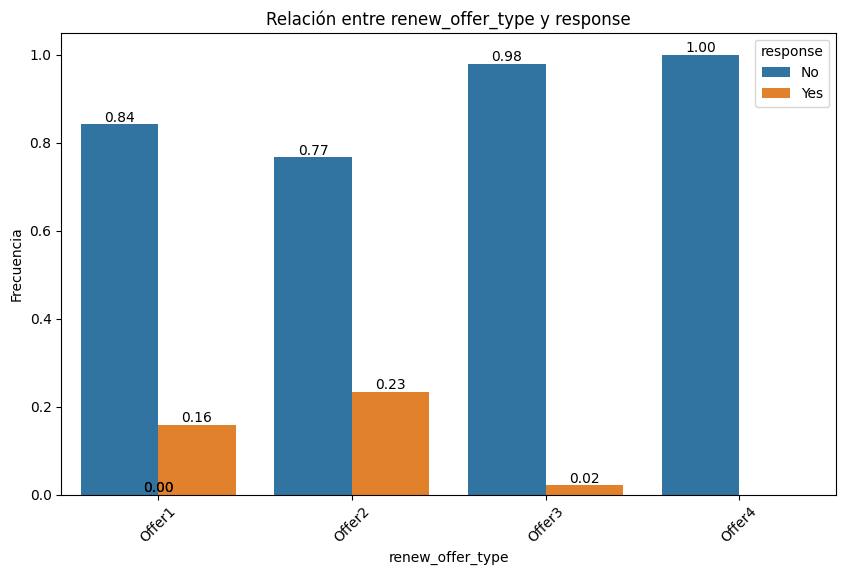

In [13]:
plot_categorical_relationship_fin(df_seguros,"renew_offer_type","response", relative_freq= True, show_values= True)

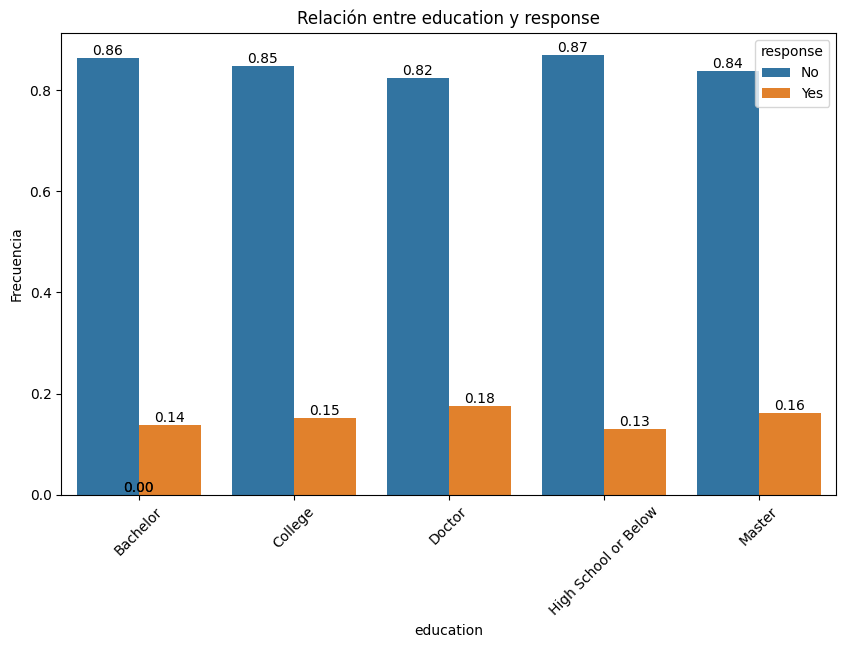

In [14]:
plot_categorical_relationship_fin(df_seguros,"education","response", relative_freq= True, show_values= True)

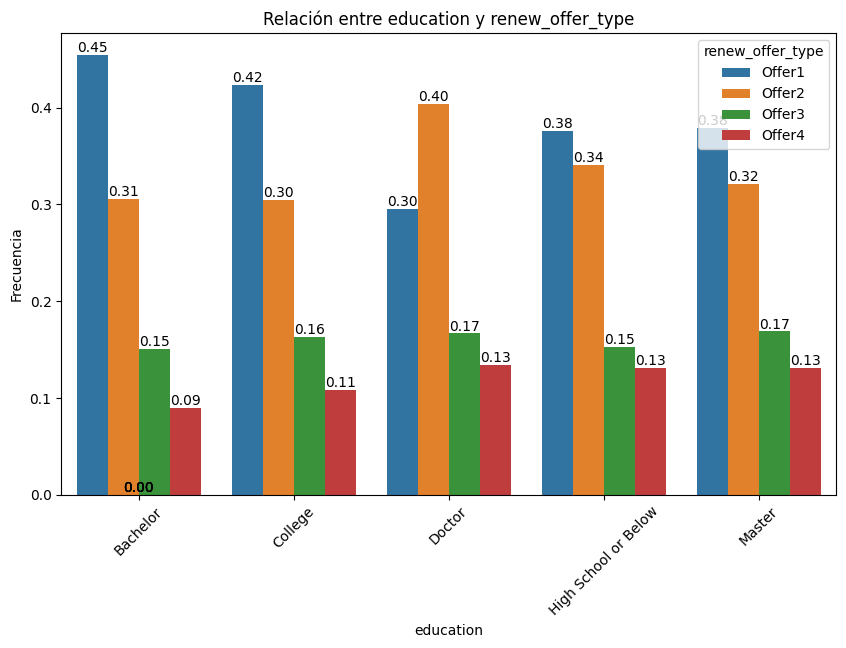

In [15]:
plot_categorical_relationship_fin(df_seguros,"education","renew_offer_type", relative_freq= True, show_values= True)

Ya podemos ir viendo algo, fijate que doctor tiene mejor ratio de respuesta, pero entre otras cosas le ofrecieron más la oferta_2

**#3 Divido mi dataset en tantos subdatasets (dataframes) como valores de mi categórica directora** y me quedo solo con las columnas de las otras dos variables

In [16]:
columnas = ["response","renew_offer_type","education"] 
col_directora = "response"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_seguros[col_directora].unique():
    diccionario_multivariante[valor] = df_seguros.loc[df_seguros[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

**#4 Hago un análsis bivariante** para cada subdataset y comparo todo

Respuesta No:


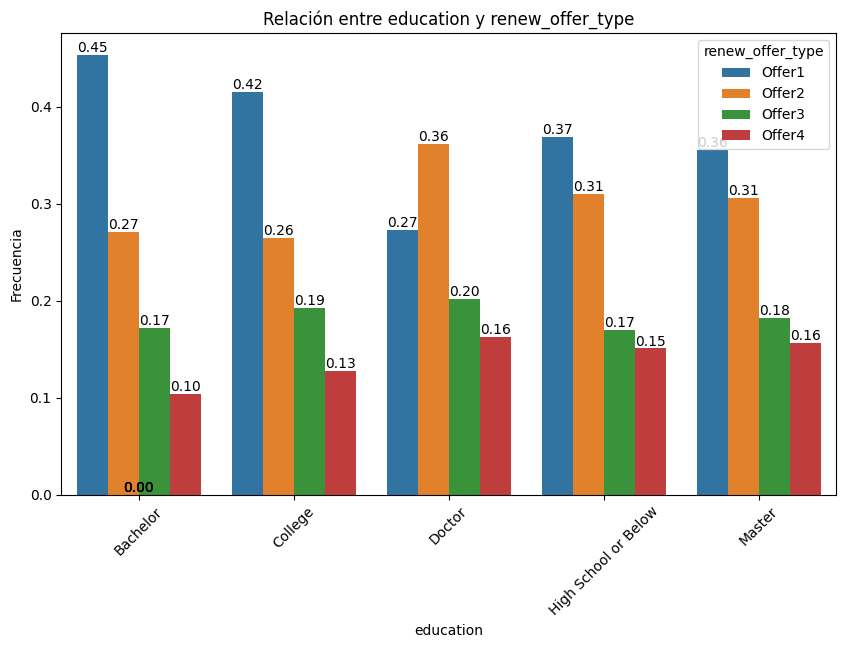

Respuesta Yes:


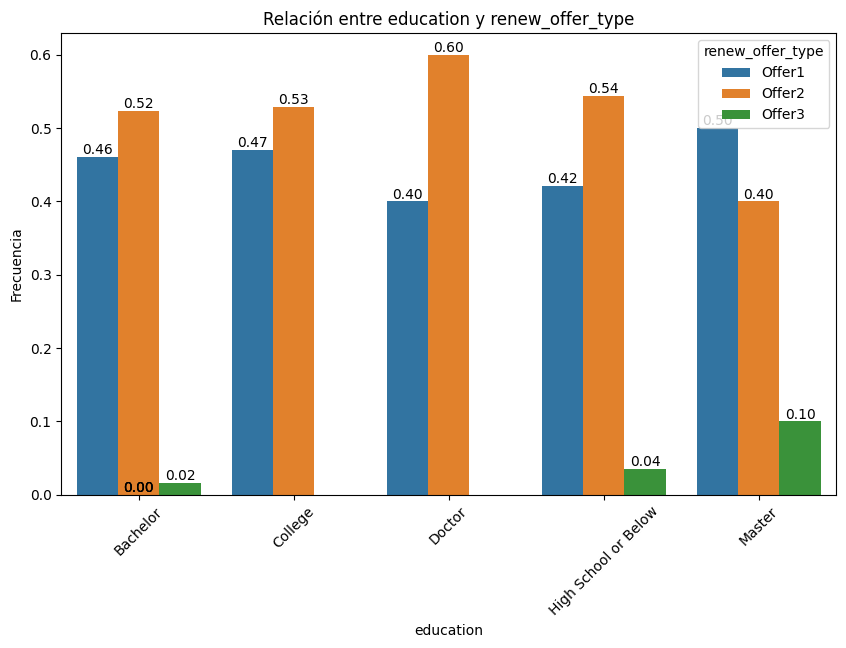

In [17]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

Y el análisis lo mezcla todo:
* De las bivariante sabemos que la oferta influye en la respuesta y también que no contestaron exactamente igual los doctores que el resto (tienen una tasa ligeramente superior de respuesta). Podría pensar que los doctores (o master) responden mejor.
* De observar la bivariante entre oferta y educación deberíamos sospechar que no tiene que ver con eso sino con el hecho de que los doctores recibieron más ofertas de tipo 2.
* El análisis a tres bandas, muestra varias cosas por un lado para todos los grupos de educación fue superior la respuesta a la oferta 2, salvo para Master y eso habría que analizarlo mejor (ya sabes algo que destaca), pero para los doctores también fue aparentemente mejor. Además en Master es donde funciona la oferta3. Estos resultados son bastante interesantes (pero poniendolos en el contexto de que tanto Doctores como Masters son los segmento más pequeños con diferencia). 
* En definitiva la oferta 2 es claramente superior, aparentemente es más efectiva en Doctores y menos efectiva en Master donde además la oferta 3 es más efectiva.

### Caso 2. Viajes. Análisis Aircompany-ingresos-consumo_kg

Aquí solo tengo una categórica, así que lo que haré será usarla para dividir el análisis en cinco (uno por cada compañía) bivariantes de dos numéricas (miraremos su scartter plot y su correlación)


**#3** Como ya tengo la directora, ya **hago la división en dataframes**

Nota Importante: Sí, debería mostrar los analisis univariantes antes y los bivariantes dos a dos... pero por tiempo te lo dejo como ejercicio

In [18]:
col_directora = "aircompany"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

**#4 Hago un análsis bivariante** para cada subdataset y comparo todo

Respuesta Airnar:


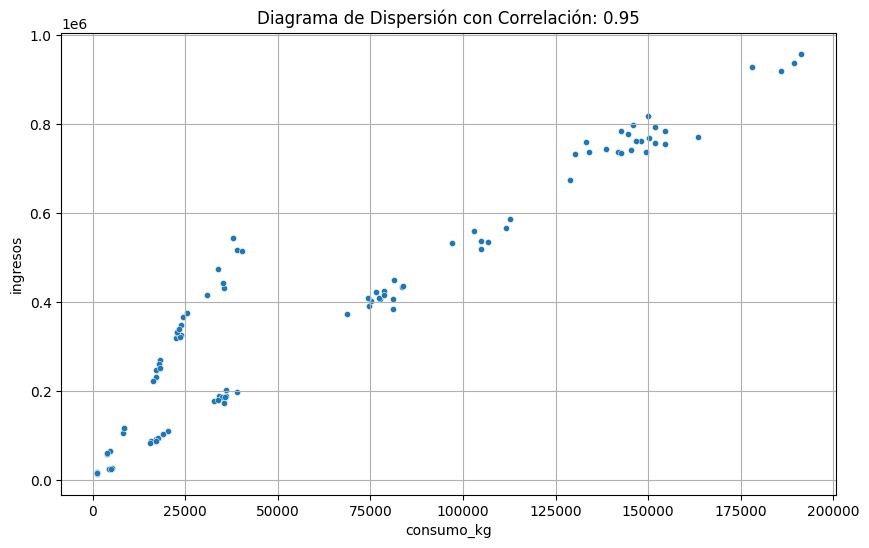

Respuesta FlyQ:


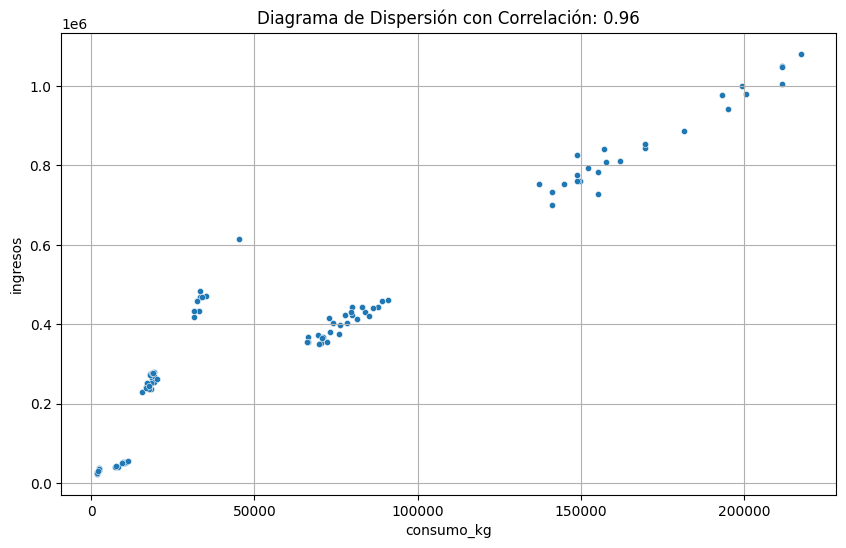

Respuesta TabarAir:


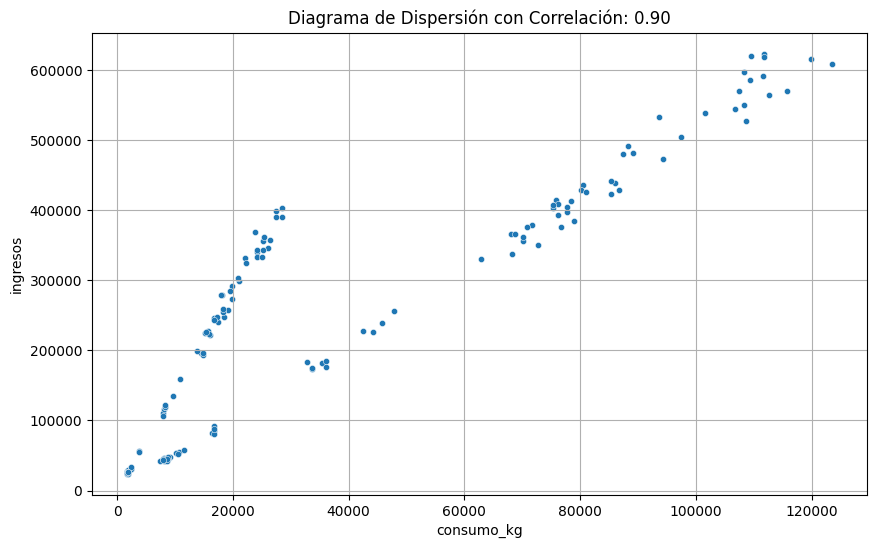

Respuesta MoldaviAir:


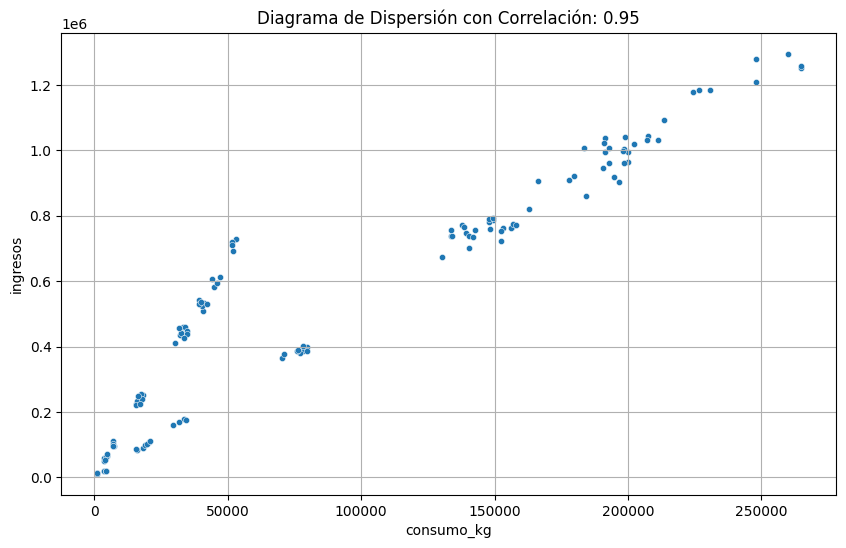

Respuesta PamPangea:


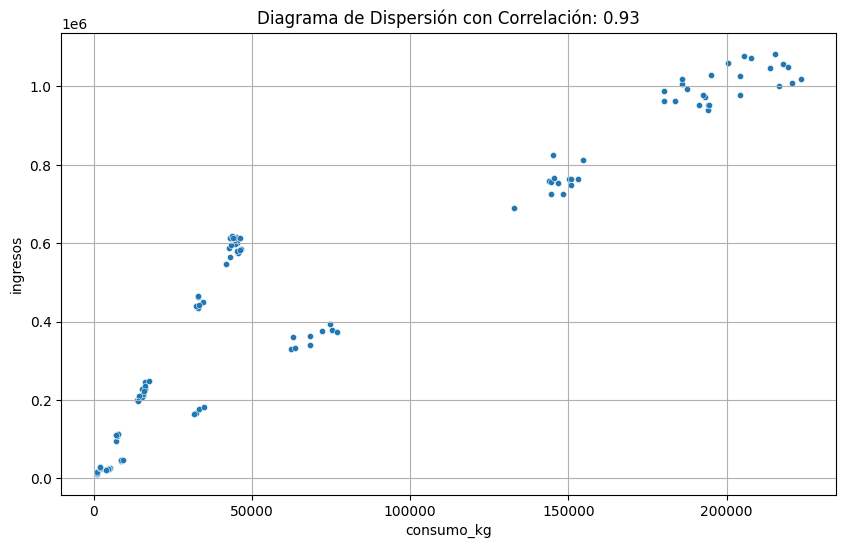

In [19]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

* En todas las compañisa hay una (esperada) correlación ente ingresos y consumos, pero el hecho de que haya realmente dos rectas nos habla de que los vuelos cortos son más eficientes que los largos (ojo para estos datos, no te lances a extrapolar para el mundo real).plot_categorical_relationship_fin
* Respecto a las compañías entre sí el gráfico invita a generar otro en el que pueda comparar las pendientes de esas marcadas relaciones lineales. Quien tenga las pendientes de las rectas mayores será la empresa más eficiente.

## Análisis de Datos (Multivariante): Todo numéricas

Supongamos que por el desarrollo y necesidades del análisis de datos tenemos que cotejar varias vairables numéricas a la vez. Además de las posibles visualizaciones que pueda recomendarte el interesante [sitio](https://www.data-to-viz.com) que ya hemos mencionado otras veces, yo te prongo como punto de partida (luego tendrás que completarlo tú) lo siguiente que viene a continuación en el notebook.

### Caso 2. Viajes: Ingresos-Consumo_kg-Distancia

Lo primero sería mostrar los valores y diagramas de cada uno así como las correlaciones dos a dos:

(3, 2)


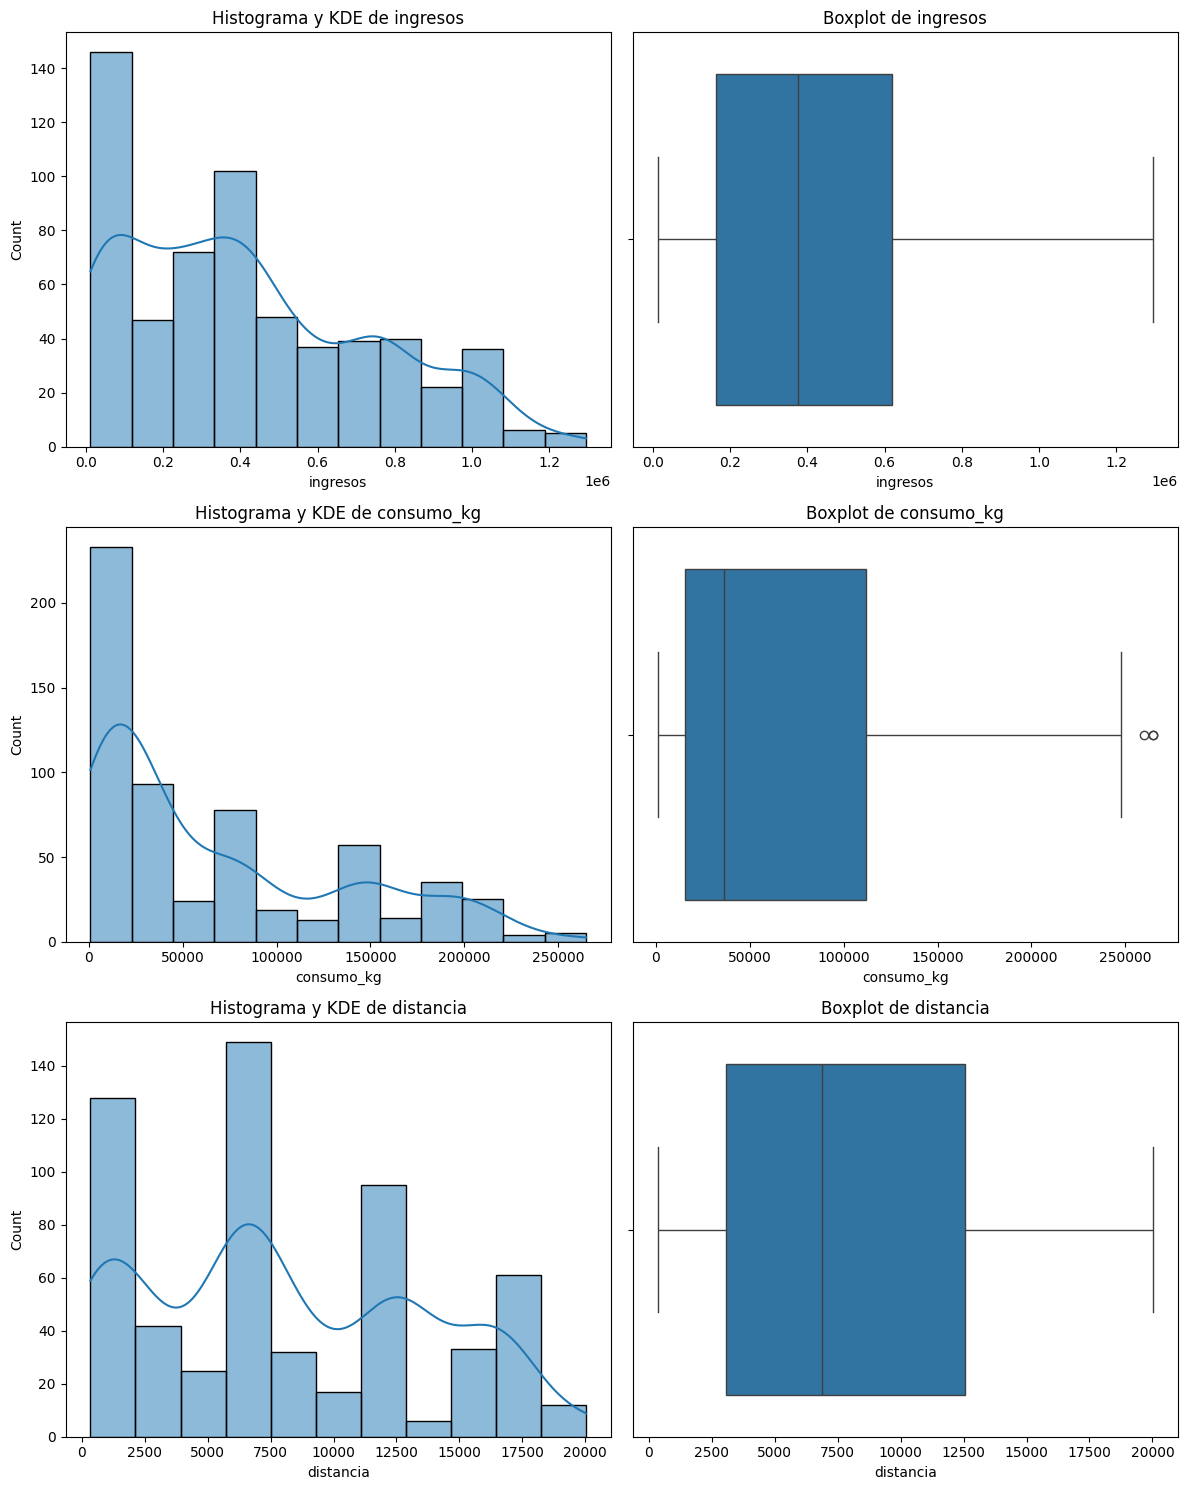

In [20]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

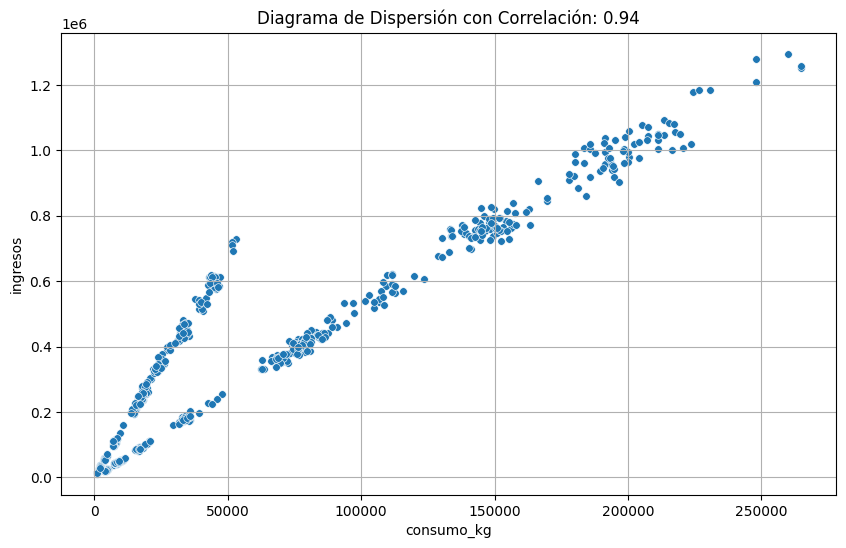

In [21]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

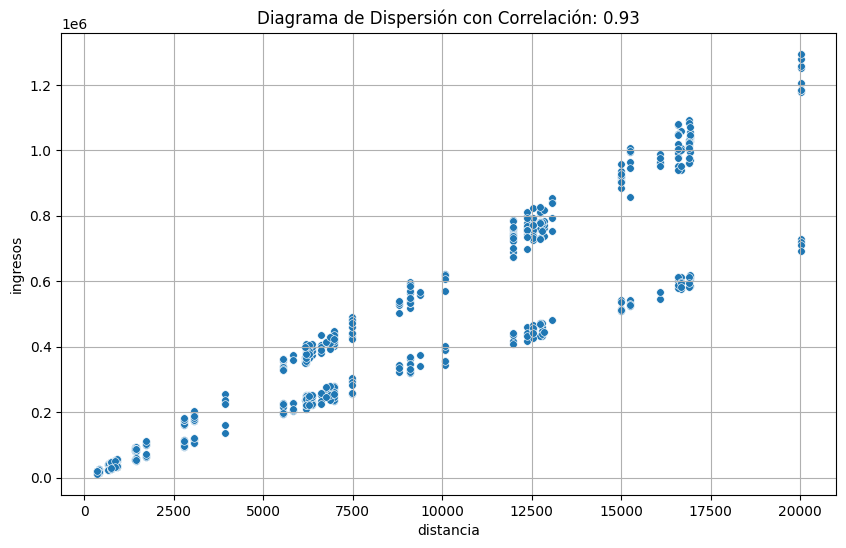

In [22]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

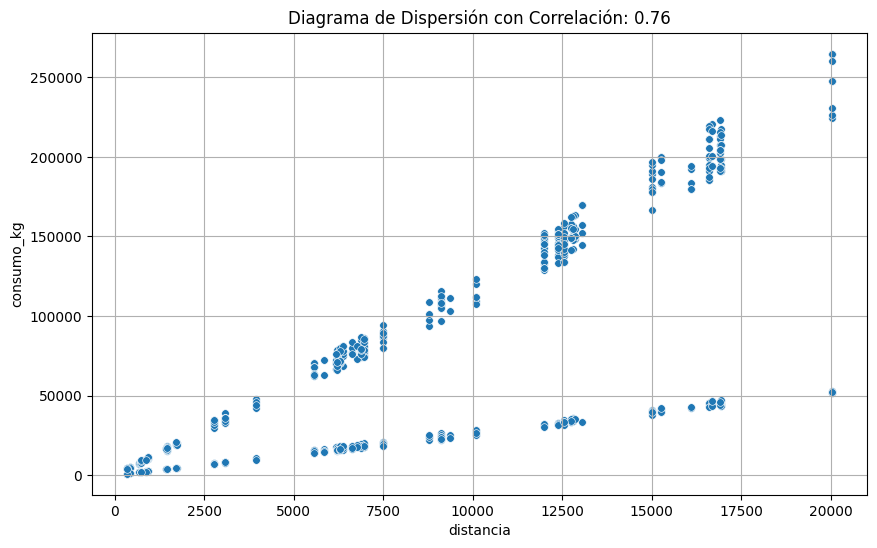

In [23]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

Lo siguiente será mostrar los tres valores a la vez, con un diagrama de burbujas que es como un scatter plot (un diagrama de dispersión) pero en el que el tamaño de los puntos los marca la tercera variable:

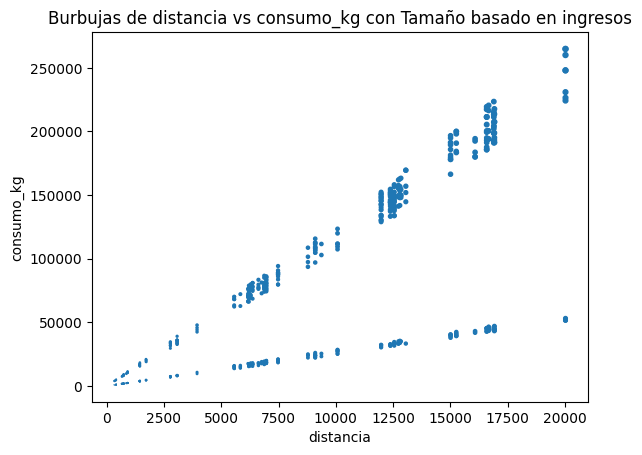

In [24]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares. Es decir parece y esta sería una gran línea de trabajo, un conjunto de viajes que son más eficientes en todos los términos que otros. 

Pero ahí no acaba el análisis. El siguente paso sería escoger una de las tres, hacerle un *binning* o convertirla a categórica y estaríamos en el análisis multivariante explicado en la sesión anterior. Este caso lo veremos en los ejercicios

### Analisis multivariante: Matriz de correlación

Para terminar, pandas permite obtner la matriz de correlación de sus variables numéricas. Es decir una matriz en la que aparecen las correlaciones (de pearson, si no se indica lo contrario) dos a dos:

Para terminar, pandas permite obtner la matriz de correlación de sus variables numéricas. Es decir una matriz en la que aparecen las correlaciones (de pearson, si no se indica lo contrario) dos a dos:

In [27]:
corr_matrix = df_seguros.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


Y aún hay más, con seaborn podemos hacer una representación de esta matriz a través de lo que se denomina un "mapa de calor":

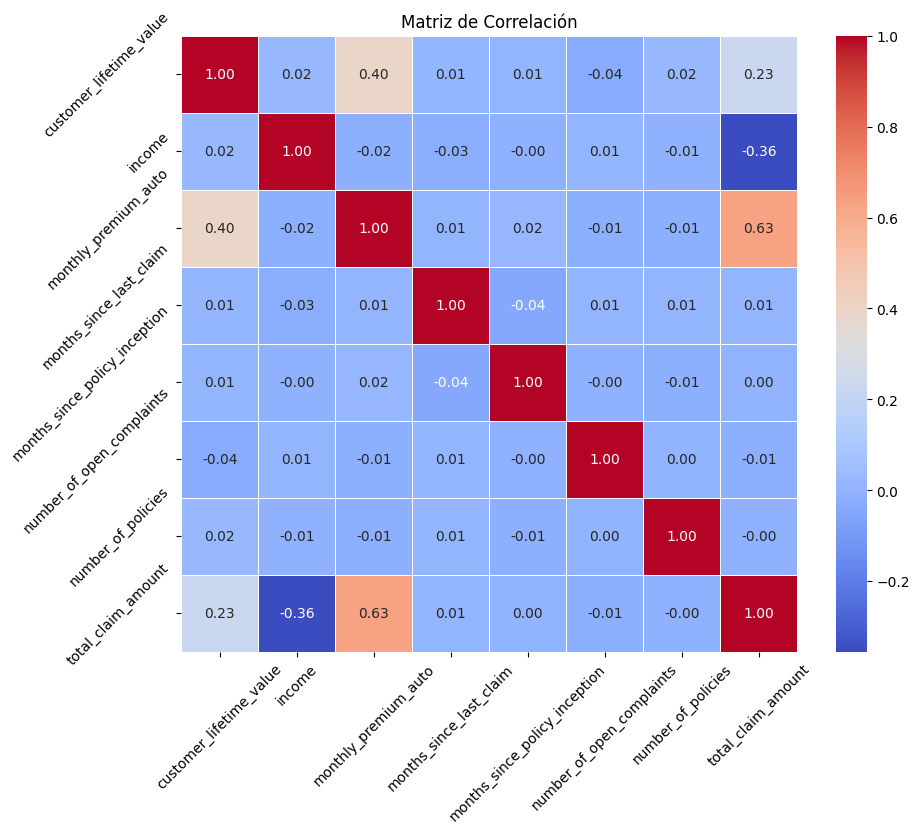

In [26]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()


Y para terminar también es posible completar tu análisis bivariante/multivariante con una visualización de los diagramas de dispersión (pero ojo que si son muchos no verás nada)

In [28]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

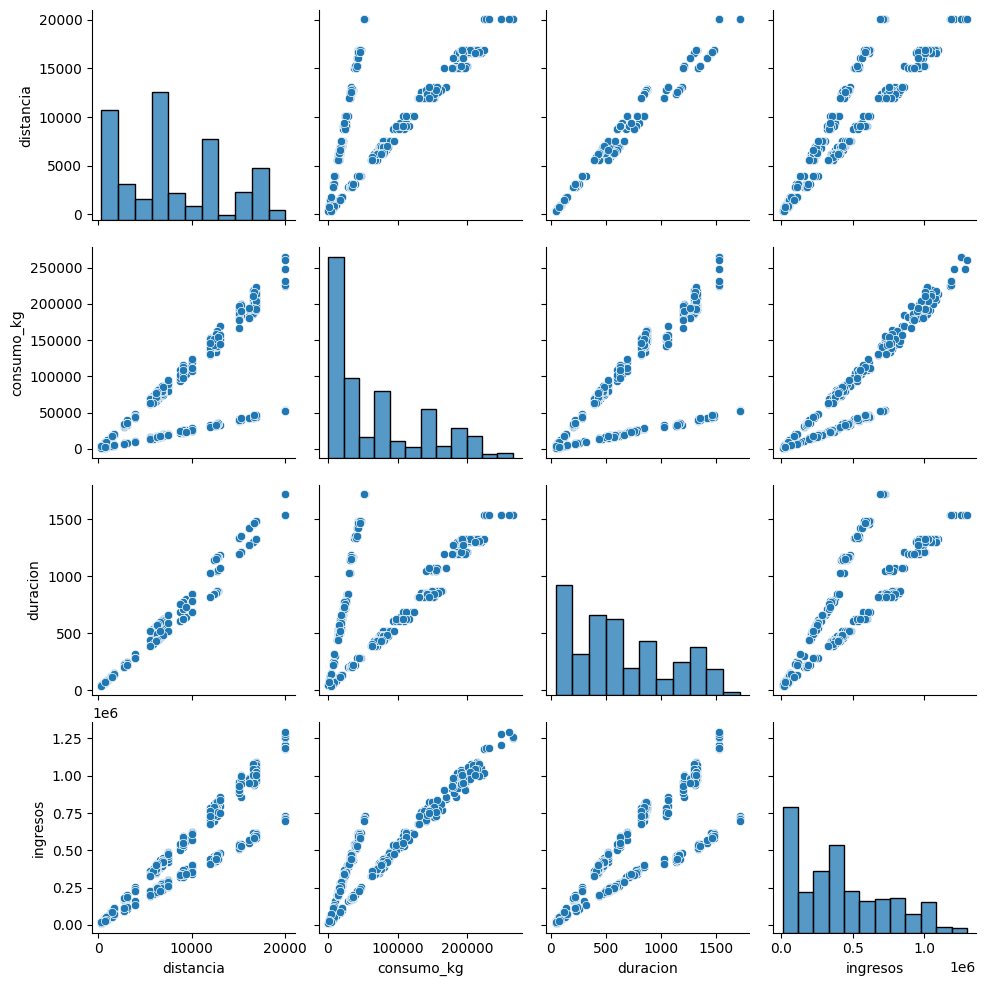

In [29]:
sns.pairplot(df_solo_numeros)
plt.show()

### ANALISIS DE DATOS: (humilde) GUIA DE REFERENCIA 

PARTE I  
1. **Establecer objetivos**  
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 

PARTE II  
4. **Aplicar tendencia central a todas las variables**  
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras   
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja  
7. **Analizar las medidas de dispersión de las variables numéricas**  
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)  
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")  
10. **Trata los outliers**: separa en dos, elimina, crea una categoría especial...   

PARTE III  
11. **Revisa prioridades, preguntas y notas hasta el momento**  
12. **Preparara el analisis bivariante** en función de la revisión anterior.  
13. **Empieza por categóricas importantes/target**: combinalas con categóricas y numéricas  
14. **Sigue con numéricas importantes/target**  
15. **Analiza las parejas de variables que necesites para contestar tus preguntas**  
    15.1 **Es directo así que: Matriz de correlación, heatmap y pairplot**  
16. **Recapitula**: Clasifica ya tus hallazgos en posibles mensajes, elementos a profundizar, cosas interesantes pero no importantes (descártalas). Añade las preguntas contestadas y la lista de preguntas sin contestar.  

PARTE IV  
17. **Intenta resolver todas las preguntas pendientes**  
18. Si necesitas análisis más complicados (3 o más variables): Planifica muy bien que grupos  
19. Aplica lo visto en estas sesiones, tendrás que probar variaciones hasta llegar a encontrar el punto adecuado.  
20. **Acaba el análisis**: Cierras las preguntas pendientes, lo que te quede por trabajar -> Lineas de trabajo futuro.  

